In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
df = pd.read_csv('/content/drive/My Drive/Reviews.csv', index_col=0)
df.head(20)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...


In [4]:
df.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
dfnew = df.dropna()
dfnew.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
dfnew.shape

(568411, 9)

In [7]:
dfnew.head(2)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [8]:
dfnew.duplicated(subset={'UserId','ProfileName','Time','Text'}).sum()

174492

In [9]:
df_new = dfnew.drop_duplicates(subset={'UserId','ProfileName','Time','Text'})
df_new.shape

(393919, 9)

Text(0.5, 1.0, 'Distribution of Scores')

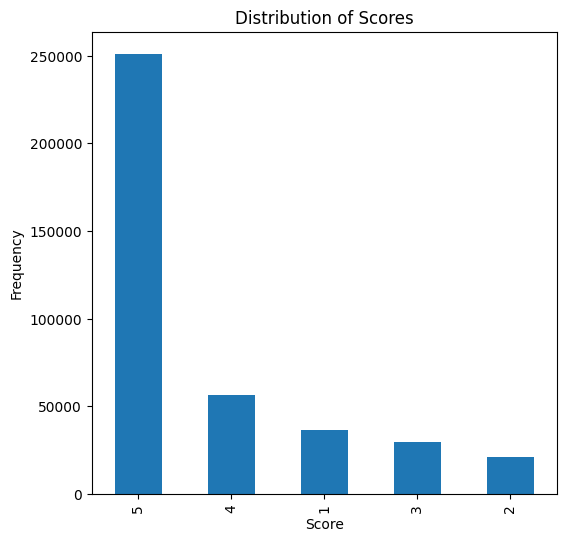

In [10]:
ax = df_new['Score'].value_counts().plot(kind='bar', figsize=(6,6))

fig=ax.get_figure()

ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

ax.set_title('Distribution of Scores')

In [11]:
df_new['label'] = df_new['Score'].apply(lambda x: 0 if x <= 3 else 1)
df_new.head(10)

<ipython-input-11-8be14e0aa7d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['label'] = df_new['Score'].apply(lambda x: 0 if x <= 3 else 1)


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1


In [12]:
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that'd": "that would",
    "that's": "that is",
    "there'd": "there had",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where'd": "where did",
    "where's": "where is",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are"
}

In [13]:
def decontract_words(s):
    text=s.split()
    new_text =[]
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    return " ".join(new_text)

In [15]:
#testing the function:
decontract_words(df_new.loc[53, 'Text'])

"This was not in stock the last time I looked. I had to go to the Vermont Country Store in Weston to find it along with a jaw harp, Cranberry Horseradish Sauce, Fartless Black Bean Salsa, Apple Cider Jelly, Newton's Cradle Art in Motion and the staple Vermont Maple Syrup.<br /><br />Back to the Ass Kickin Peanuts. They are hot. They will activate the perspiration glands behind your ears and under your arms. It requires a beverage as advertised, a glass of very cold milk, and a box of Kleenex since it will make your nose run. They look like ordinary peanuts which is already giving me ideas for work. I suspect that some people have been hitting my goodies in my absence, especially my colleague Greg. I'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can, and then see whose crying or whose nose is running when I return.<br /><br />The can should be shaken to ensure the spices are evenly distributed. It is important t

In [16]:
df_new.loc[53, 'Text']
#we can tell how some words were decontracted if we compare this text to the previous one

"This wasn't in stock the last time I looked. I had to go to the Vermont Country Store in Weston to find it along with a jaw harp, Cranberry Horseradish Sauce, Fartless Black Bean Salsa, Apple Cider Jelly, Newton's Cradle Art in Motion and the staple Vermont Maple Syrup.<br /><br />Back to the Ass Kickin Peanuts. They are hot. They will activate the perspiration glands behind your ears and under your arms. It requires a beverage as advertised, a glass of very cold milk, and a box of Kleenex since it will make your nose run. They look like ordinary peanuts which is already giving me ideas for work. I suspect that some people have been hitting my goodies in my absence, especially my colleague Greg. I'm going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can, and then see whose crying or whose nose is running when I return.<br /><br />The can should be shaken to ensure the spices are evenly distributed. It is important to

In [17]:
# function to format words and remove unwanted characters using regex
def format_text_regex(text):
    text = re.sub(r'<br />', ' ', text) #remove html style <br>
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) #clean all URLs
    text = re.sub(r'\<a href', ' ', text) #clean html style URL
    text = re.sub(r'&amp;', '', text) #remove &amp; chars
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text) #remove special characters
    text = re.sub(r'\'', ' ', text)
    return text

In [18]:
#testing:
format_text_regex(df_new.loc[53, 'Text'])

'This wasn t in stock the last time I looked  I had to go to the Vermont Country Store in Weston to find it along with a jaw harp  Cranberry Horseradish Sauce  Fartless Black Bean Salsa  Apple Cider Jelly  Newton s Cradle Art in Motion and the staple Vermont Maple Syrup   Back to the Ass Kickin Peanuts  They are hot  They will activate the perspiration glands behind your ears and under your arms  It requires a beverage as advertised  a glass of very cold milk  and a box of Kleenex since it will make your nose run  They look like ordinary peanuts which is already giving me ideas for work  I suspect that some people have been hitting my goodies in my absence  especially my colleague Greg  I m going to take this to work at earliest opportunity and empty the contents of this can into an ordinary Planters Peanuts can  and then see whose crying or whose nose is running when I return   The can should be shaken to ensure the spices are evenly distributed  It is important to wash your hands aft

In [19]:
def remove_stopwords(text):
    stops = set(stopwords.words('english'))
    text = text.split()
    text = [w for w in text if not w in stops]
    return ' '.join(text)

In [21]:
#joining all functions in 1 function which calls them all and completely cleans any text
def clean_text(text):
    text = decontract_words(text)
    text = format_text_regex(text)
    text = remove_stopwords(text)
    text = text.lower() #convert to lowercase
    text = nltk.WordPunctTokenizer().tokenize(text)
    return text

In [22]:
df_new["Text_Cleaned"] = list(map(clean_text, df_new.Text))
df_new.head(3)

<ipython-input-22-8bb25ebe3373>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Text_Cleaned"] = list(map(clean_text, df_new.Text))


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,Text_Cleaned
Id,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,"[i, bought, several, vitality, canned, dog, fo..."
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,"[product, arrived, labeled, jumbo, salted, pea..."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,"[this, confection, around, centuries, it, ligh..."


In [23]:
# function to lemmatize words in text cleaned and create a new column lemmatized text and store them there
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df_new['lemmatized_text'] = list(map(lambda word:list(map(lemm.lemmatize, word)),df_new.Text_Cleaned))

lemmatized_words(df_new.Text_Cleaned)
df_new.head(3)

<ipython-input-23-f552593f1669>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lemmatized_text'] = list(map(lambda word:list(map(lemm.lemmatize, word)),df_new.Text_Cleaned))


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,Text_Cleaned,lemmatized_text
Id,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,"[i, bought, several, vitality, canned, dog, fo...","[i, bought, several, vitality, canned, dog, fo..."
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,"[product, arrived, labeled, jumbo, salted, pea...","[product, arrived, labeled, jumbo, salted, pea..."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,"[this, confection, around, centuries, it, ligh...","[this, confection, around, century, it, light,..."


In [24]:
df_new = df_new.drop(['UserId','ProductId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary','Text','Text_Cleaned'],axis=1)
df_new.head(10)

,label,lemmatized_text
Id,,
1,1,"[i, bought, several, vitality, canned, dog, fo..."
2,0,"[product, arrived, labeled, jumbo, salted, pea..."
3,1,"[this, confection, around, century, it, light,..."
4,0,"[if, looking, secret, ingredient, robitussin, ..."
5,1,"[great, taffy, great, price, there, wide, asso..."
6,1,"[i, got, wild, hair, taffy, ordered, five, pou..."
7,1,"[this, saltwater, taffy, great, flavor, soft, ..."
8,1,"[this, taffy, good, it, soft, chewy, the, flav..."
9,1,"[right, i, mostly, sprouting, cat, eat, grass,..."


In [26]:
df = df_new
df.head(5)

,label,lemmatized_text
Id,,
1,1,"[i, bought, several, vitality, canned, dog, fo..."
2,0,"[product, arrived, labeled, jumbo, salted, pea..."
3,1,"[this, confection, around, century, it, light,..."
4,0,"[if, looking, secret, ingredient, robitussin, ..."
5,1,"[great, taffy, great, price, there, wide, asso..."


In [27]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=72)

In [28]:
print(train_data.shape)
print(test_data.shape)

(315135, 2)
(78784, 2)


In [29]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(1,3), lowercase=False)

In [30]:
X_tr_bow = bow_transform.fit_transform(train_data['lemmatized_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
len(bow_transform.vocabulary_)

12701050

In [32]:
X_tr_bow.shape

(315135, 12701050)

In [33]:
X_te_bow = bow_transform.transform(test_data['lemmatized_text'])

In [34]:
y_tr = train_data['label']
y_te = test_data['label']

In [35]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test):
  lr = LogisticRegression(max_iter=1000)
  model = lr.fit(X_tr, y_tr)
  y_pred = lr.predict(X_test)
  print(classification_report(y_test, y_pred))
  return model

In [36]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77     17321
           1       0.92      0.96      0.94     61463

    accuracy                           0.90     78784
   macro avg       0.88      0.84      0.85     78784
weighted avg       0.90      0.90      0.90     78784



In [38]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=72) #use 50 trees with a height of 10
rf.fit(X_tr_bow, y_tr)

# Predict on the test data
y_pred_rf = rf.predict(X_te_bow)
print(classification_report(y_te, y_pred_rf))
#as we can see here, we get an accuracy of 0.78, however, this is because the data is not balanced and most
#  of the labels are 1. For this reason we have a recall of 1 for 1 and 0.00 for 0 since we are
#  always predicting 1
#  Our accuracy however is way less than that of the logistic regression which is 0.9, for this reason
#  we can consider the logistic regression model to be better than the random forest model for this data.
#  However, let's check of balancing the data can solve the issue for both models since also in the logistic
#  regression we are getting a recall of 0.71 for the 0 labels which is not the best

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17321
           1       0.78      1.00      0.88     61463

    accuracy                           0.78     78784
   macro avg       0.39      0.50      0.44     78784
weighted avg       0.61      0.78      0.68     78784



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# let's try to balance the data
df_label_0 = df[df["label"] == 0]
df_label_1 = df[df["label"] == 1]

# Get the number of samples with label 1
print(len(df_label_1))
print(len(df_label_0))

#we want to try and reduce our data to have the labels 0 and 1 somewhat close to each other

307049
86870


In [40]:
# take 50% of the samples with label 1. Doing this should give us the samples with label 1
#  to be double the amount of the samples with label 0 instead of 4x.
df_label_1_sampled = df_label_1.sample(frac=0.5, random_state=72)

# create the new dataset by joining both labels
df_balanced = pd.concat([df_label_0, df_label_1_sampled])

# shuffle all the rows back
df_balanced = df_balanced.sample(frac=1, random_state=72)

In [41]:
df_balanced.shape

(240394, 2)

In [42]:
df_balanced.head(10)

,label,lemmatized_text
Id,,
261413,1,"[these, delicious, cinnamon, roll, without, ca..."
35242,0,"[start, saying, love, golden, vanilla, oreo, o..."
409779,0,"[here, another, company, charge, outlandish, s..."
458597,1,"[i, bought, set, gift, mother, law, cause, enj..."
22613,1,"[great, cat, food, mine, love, stuff, it, also..."
524781,1,"[praise, god, wonderful, tea, overuse, antibio..."
494926,1,"[the, original, synergy, lab, richard, organic..."
504127,1,"[i, purchased, oktoberfest, party, lot, left, ..."
448434,1,"[this, fun, little, gift, sharing, sunshine, c..."


In [43]:
train_bal, test_bal = train_test_split(df_balanced, test_size=0.2, random_state=72)

In [44]:
print(train_bal.shape)
print(test_bal.shape)

(192315, 2)
(48079, 2)


In [45]:
X_tr_bow_bal = bow_transform.fit_transform(train_bal['lemmatized_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
X_tr_bow_bal.shape

(192315, 8654055)

In [47]:
X_te_bow_bal = bow_transform.transform(test_bal['lemmatized_text'])

In [48]:
y_tr_bal = train_bal['label']
y_te_bal = test_bal['label']

In [49]:
model_bow_bal = simple_logistic_classify(X_tr_bow_bal, y_tr_bal, X_te_bow_bal, y_te_bal)
#recall for the 0 labels improved in this case by a lot, although accuracy decreased slightly, however
#  looking at accuracy only is not a good measure of testing
#  we should always look at the other measurements, and in this case, since we balanced our data,
#  we got better recall and precision for the 0 labels

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     17432
           1       0.89      0.92      0.90     30647

    accuracy                           0.88     48079
   macro avg       0.87      0.86      0.86     48079
weighted avg       0.88      0.88      0.88     48079



In [50]:
rf.fit(X_tr_bow_bal, y_tr_bal)

# Predict on the test data
y_pred_rf_bal = rf.predict(X_te_bow_bal)
print(classification_report(y_te_bal, y_pred_rf_bal))
#in this model, recall and precision didn't improve much,
#  and accuracy dropped drastically to 0.64. We can infer from this that random forest is not a good model
#  for the data we have. We are getting way better results using logistic regression. taking 50% of the sample
#  for the 1 labels improved logistic regression a lot however it barely had a good impact on the random forest.
#  for this reason, we should avoid using random forest and use logistic regression instead

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17432
           1       0.64      1.00      0.78     30647

    accuracy                           0.64     48079
   macro avg       0.32      0.50      0.39     48079
weighted avg       0.41      0.64      0.50     48079



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
